In [1]:
pip install numpy pandas matplotlib seaborn scikit-learn



[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: C:\Users\Артем\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd

# укажи свой путь и имя файла
file_path = "C:/Users/Артем/Desktop/Дома.xlsm"


In [3]:
pip install openpyxl


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: C:\Users\Артем\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [4]:
df = pd.read_excel(file_path, engine="openpyxl")

# посмотреть первые строки
print(df.head())

  shortname_region formalname_region shortname_city formalname_city  \
0             Респ            Адыгея              г        Адыгейск   
1             Респ            Адыгея              г        Адыгейск   
2             Респ            Адыгея              г        Адыгейск   
3             Респ            Адыгея              г        Адыгейск   
4             Респ            Адыгея              г        Адыгейск   

                                          address  built_year  \
0                Респ. Адыгея, г. Адыгейск, д. 66         NaN   
1    Респ. Адыгея, г. Адыгейск, ул. 8 Марта, д. 7         NaN   
2   Респ. Адыгея, г. Адыгейск, ул. 8 Марта, д. 54         NaN   
3  Респ. Адыгея, г. Адыгейск, ул. 8 Марта, д. 388         NaN   
4  Респ. Адыгея, г. Адыгейск, ул. 8 Марта, д. 785      2008.0   

   exploitation_start_year project_type           house_type is_alarm  ...  \
0                      NaN          NaN                  NaN      Нет  ...   
1                      NaN

In [5]:
df.head()

,shortname_region,formalname_region,shortname_city,formalname_city,address,built_year,exploitation_start_year,project_type,house_type,is_alarm,...,heating_type,hot_water_type,cold_water_type,sewerage_type,sewerage_cesspools_volume,gas_type,ventilation_type,firefighting_type,drainage_type,energy_efficiency_predict
0,Респ,Адыгея,г,Адыгейск,"Респ. Адыгея, г. Адыгейск, д. 66",NaN,NaN,NaN,NaN,Нет,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C
1,Респ,Адыгея,г,Адыгейск,"Респ. Адыгея, г. Адыгейск, ул. 8 Марта, д. 7",NaN,NaN,NaN,NaN,Нет,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C
2,Респ,Адыгея,г,Адыгейск,"Респ. Адыгея, г. Адыгейск, ул. 8 Марта, д. 54",NaN,NaN,NaN,NaN,Нет,...,NaN,NaN,NaN,NaN,NaN,Автономное,NaN,NaN,NaN,F
3,Респ,Адыгея,г,Адыгейск,"Респ. Адыгея, г. Адыгейск, ул. 8 Марта, д. 388",NaN,NaN,NaN,NaN,Нет,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C
4,Респ,Адыгея,г,Адыгейск,"Респ. Адыгея, г. Адыгейск, ул. 8 Марта, д. 785",2008.0,2000.0,1963,Многоквартирный дом,Нет,...,"Автономная котельная (крышная, встроенно-прист...",Закрытая с приготовлением горячей воды на ЦТП,Автономное,Отсутствует,198654.2,Отсутствует,Приточная вентиляция,Пожарные гидранты,Внутренние водостоки,B++


In [6]:
df.columns

Index(['shortname_region', 'formalname_region', 'shortname_city',
       'formalname_city', 'address', 'built_year', 'exploitation_start_year',
       'project_type', 'house_type', 'is_alarm', 'floor_count_max',
       'entrance_count', 'elevators_count', 'energy_efficiency', 'area_total',
       'area_residential', 'area_non_residential', 'foundation_type',
       'floor_type', 'wall_material', 'basement_area', 'chute_type',
       'chute_count', 'electrical_type', 'electrical_entries_count',
       'heating_type', 'hot_water_type', 'cold_water_type', 'sewerage_type',
       'sewerage_cesspools_volume', 'gas_type', 'ventilation_type',
       'firefighting_type', 'drainage_type', 'energy_efficiency_predict'],
      dtype='object')

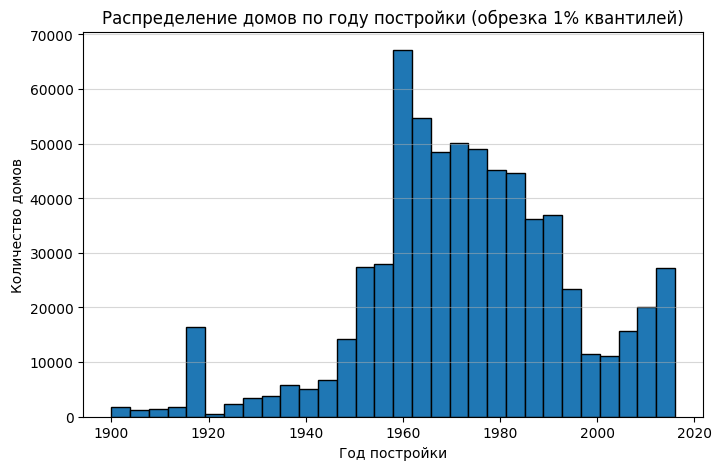

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# приводим built_year к числам
df["built_year"] = pd.to_numeric(df["built_year"], errors="coerce")

# считаем пороги
low = df["built_year"].quantile(0.01)
high = df["built_year"].quantile(0.99)

# фильтруем данные
df_filtered = df[(df["built_year"] >= low) & (df["built_year"] <= high)]

# строим гистограмму
plt.figure(figsize=(8,5))
plt.hist(df_filtered["built_year"].dropna(), bins=30, edgecolor="black")

plt.title("Распределение домов по году постройки (обрезка 1% квантилей)")
plt.xlabel("Год постройки")
plt.ylabel("Количество домов")
plt.grid(axis="y", alpha=0.5)

plt.show()


In [8]:
df["built_year"] = pd.to_numeric(df["built_year"], errors="coerce")

avg_years = df.groupby("energy_efficiency")["built_year"].mean()
print(avg_years)

energy_efficiency
A      1986.439961
A+     2011.112540
A++    2003.127660
B      1994.390359
B+     2002.612018
B++    1977.093329
C      1991.621804
D      1971.334322
E      1969.762234
F      1963.611791
G      1968.026744
Name: built_year, dtype: float64


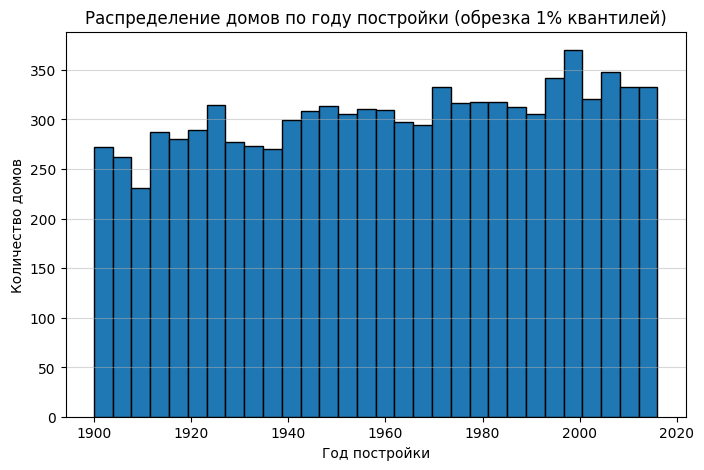

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# приводим built_year к числам
df["area_total"] = pd.to_numeric(df["area_total"], errors="coerce")

# считаем пороги
low = df["built_year"].quantile(0.01)
high = df["built_year"].quantile(0.99)

# фильтруем данные
df_filtered = df[(df["area_total"] >= low) & (df["area_total"] <= high)]

# строим гистограмму
plt.figure(figsize=(8,5))
plt.hist(df_filtered["area_total"].dropna(), bins=30, edgecolor="black")

plt.title("Распределение домов по году постройки (обрезка 1% квантилей)")
plt.xlabel("Год постройки")
plt.ylabel("Количество домов")
plt.grid(axis="y", alpha=0.5)

plt.show()


In [10]:
df.head()

,shortname_region,formalname_region,shortname_city,formalname_city,address,built_year,exploitation_start_year,project_type,house_type,is_alarm,...,heating_type,hot_water_type,cold_water_type,sewerage_type,sewerage_cesspools_volume,gas_type,ventilation_type,firefighting_type,drainage_type,energy_efficiency_predict
0,Респ,Адыгея,г,Адыгейск,"Респ. Адыгея, г. Адыгейск, д. 66",NaN,NaN,NaN,NaN,Нет,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C
1,Респ,Адыгея,г,Адыгейск,"Респ. Адыгея, г. Адыгейск, ул. 8 Марта, д. 7",NaN,NaN,NaN,NaN,Нет,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C
2,Респ,Адыгея,г,Адыгейск,"Респ. Адыгея, г. Адыгейск, ул. 8 Марта, д. 54",NaN,NaN,NaN,NaN,Нет,...,NaN,NaN,NaN,NaN,NaN,Автономное,NaN,NaN,NaN,F
3,Респ,Адыгея,г,Адыгейск,"Респ. Адыгея, г. Адыгейск, ул. 8 Марта, д. 388",NaN,NaN,NaN,NaN,Нет,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C
4,Респ,Адыгея,г,Адыгейск,"Респ. Адыгея, г. Адыгейск, ул. 8 Марта, д. 785",2008.0,2000.0,1963,Многоквартирный дом,Нет,...,"Автономная котельная (крышная, встроенно-прист...",Закрытая с приготовлением горячей воды на ЦТП,Автономное,Отсутствует,198654.2,Отсутствует,Приточная вентиляция,Пожарные гидранты,Внутренние водостоки,B++


In [11]:
df_cut = df[['formalname_region', 'built_year', 'energy_efficiency', 'area_total']]

In [12]:
df_cut

,formalname_region,built_year,energy_efficiency,area_total
0,Адыгея,NaN,C,8.0
1,Адыгея,NaN,C,NaN
2,Адыгея,NaN,F,7890.0
3,Адыгея,NaN,C,NaN
4,Адыгея,2008.0,B++,76.7
...,...,...,...,...
1026337,Севастополь,1946.0,C,614.2
1026338,Севастополь,1950.0,C,348.1
1026339,Севастополь,1955.0,C,632.5
1026340,Севастополь,2018.0,A,2203.4


In [13]:
regions = [
    "Курганская",
    "Свердловская",
    "Тюменская",
    "Ханты-Мансийский Автономный округ - Югра",
    "Челябинская",
    "Ямало-Ненецкий"
]

df_cut = df_cut[df_cut["formalname_region"].isin(regions)]

In [14]:
df_cut

,formalname_region,built_year,energy_efficiency,area_total
299948,Тюменская,NaN,B++,502.0
396566,Курганская,NaN,C,NaN
396567,Курганская,NaN,C,NaN
396568,Курганская,NaN,C,NaN
396569,Курганская,NaN,C,NaN
...,...,...,...,...
1023395,Ямало-Ненецкий,1990.0,A,91.7
1023396,Ямало-Ненецкий,1994.0,A,189.5
1023397,Ямало-Ненецкий,2007.0,A,179.3
1023398,Ямало-Ненецкий,2008.0,A,251.9


In [15]:
df_cut.isna().sum()

formalname_region        0
built_year           29721
energy_efficiency        0
area_total           14329
dtype: int64

In [16]:
df_cut_cleaned = df_cut.dropna()


In [17]:
coeffs = {
    "A++": 0.4,
    "A+": 0.5,
    "A": 0.6,
    "B++": 0.63,
    "B+": 0.66,
    "B": 0.7,
    "C": 0.85,
    "D": 1,
    "E": 1.25,
    "F": 1.5,
    "G": 1.75
}

# создаём новый столбец
df_cut_cleaned["area_eff"] = df_cut_cleaned["area_total"] * df_cut_cleaned["energy_efficiency"].map(coeffs)


C:\Users\Артем\AppData\Local\Temp\ipykernel_9004\2022551181.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cut_cleaned["area_eff"] = df_cut_cleaned["area_total"] * df_cut_cleaned["energy_efficiency"].map(coeffs)


In [18]:
df_cut_cleaned

,formalname_region,built_year,energy_efficiency,area_total,area_eff
396666,Курганская,1970.0,E,1479.90,1849.875
396687,Курганская,2001.0,E,3911.00,4888.750
396688,Курганская,1989.0,E,3406.20,4257.750
396689,Курганская,1986.0,E,8552.70,10690.875
396691,Курганская,1967.0,D,2026.06,2026.060
...,...,...,...,...,...
1023395,Ямало-Ненецкий,1990.0,A,91.70,55.020
1023396,Ямало-Ненецкий,1994.0,A,189.50,113.700
1023397,Ямало-Ненецкий,2007.0,A,179.30,107.580
1023398,Ямало-Ненецкий,2008.0,A,251.90,151.140


In [19]:
df_filtered_cut_cleaned = (
    df_cut_cleaned
    .groupby(["formalname_region", "built_year", "energy_efficiency"], as_index=False)
    .agg({"area_eff": "sum"})
    .sort_values(["formalname_region", "built_year"])
)


In [20]:
df_filtered_cut_cleaned

,formalname_region,built_year,energy_efficiency,area_eff
0,Курганская,0.0,B++,0.000
1,Курганская,0.0,D,6191.600
2,Курганская,0.0,E,6249.125
3,Курганская,1661.0,E,5981.500
4,Курганская,1696.0,E,4513.875
...,...,...,...,...
3038,Ямало-Ненецкий,2019.0,B,1973.720
3039,Ямало-Ненецкий,2019.0,B++,8558.739
3040,Ямало-Ненецкий,2020.0,A++,3919.840
3041,Ямало-Ненецкий,2021.0,A++,5547.040


In [21]:
import pandas as pd

# группировка и сумма по срезу
df_grouped = (
    df_filtered_cut_cleaned
    .groupby(["formalname_region", "built_year"], as_index=False)
    .agg({"area_eff": "sum"})
    .sort_values(["formalname_region", "built_year"])
)

# накопительная сумма по региону (и при желании — по energy_efficiency отдельно)
df_grouped["area_eff_cumsum"] = (
    df_grouped
    .groupby(["formalname_region"])["area_eff"]
    .cumsum()
)

df_grouped


,formalname_region,built_year,area_eff,area_eff_cumsum
0,Курганская,0.0,12440.725,1.244073e+04
1,Курганская,1661.0,5981.500,1.842222e+04
2,Курганская,1696.0,4513.875,2.293610e+04
3,Курганская,1855.0,447.875,2.338397e+04
4,Курганская,1860.0,158.700,2.354267e+04
...,...,...,...,...
648,Ямало-Ненецкий,2018.0,30901.885,1.049310e+07
649,Ямало-Ненецкий,2019.0,12425.779,1.050552e+07
650,Ямало-Ненецкий,2020.0,3919.840,1.050944e+07
651,Ямало-Ненецкий,2021.0,5547.040,1.051499e+07


In [22]:
df_grouped.head()

,formalname_region,built_year,area_eff,area_eff_cumsum
0,Курганская,0.0,12440.725,12440.725
1,Курганская,1661.0,5981.500,18422.225
2,Курганская,1696.0,4513.875,22936.100
3,Курганская,1855.0,447.875,23383.975
4,Курганская,1860.0,158.700,23542.675


In [23]:
import pandas as pd

data_climate = {
    "Год": list(range(1960, 2061)),
    "Зима": [
        -20.17, -20.63, -21.06, -21.06, -20.75, -21.45, -20.68, -21.52, -20.79, -20.81,
        -20.28, -20.36, -20.98, -21.02, -21.10, -20.50, -20.59, -21.03, -20.63, -20.56,
        -19.91, -20.60, -19.89, -21.12, -21.46, -20.42, -19.80, -19.60, -20.78, -20.15,
        -19.35, -19.76, -19.20, -20.10, -20.24, -20.70, -19.23, -19.84, -19.61, -20.22,
        -19.22, -19.22, -19.00, -18.41, -19.06, -19.48, -18.67, -19.38, -18.43, -19.27,
        -19.20, -18.76, -19.42, -18.03, -18.68, -18.74, -17.84, -17.83, -18.53, -17.87,
        -17.91, -18.74, -16.77, -18.19, -18.32, -17.98, -17.89, -16.90, -16.96, -17.12,
        -17.82, -17.27, -17.08, -17.05, -17.03, -16.52, -16.67, -17.36, -16.91, -16.02,
        -16.22, -16.59, -16.73, -16.57, -16.79, -16.76, -16.73, -15.68, -15.76, -16.37,
        -15.66, -15.92, -15.81, -15.60, -15.78, -15.98, -15.57, -16.29, -15.93, -15.09,
        -15.10
    ]
}

df_ufo_climate = pd.DataFrame(data_climate)
df_ufo_climate

,Год,Зима
0,1960,-20.17
1,1961,-20.63
2,1962,-21.06
3,1963,-21.06
4,1964,-20.75
...,...,...
96,2056,-15.57
97,2057,-16.29
98,2058,-15.93
99,2059,-15.09


In [24]:

data_region_heat = {
    "Курганская область": [
        2445.9, 2112.2, 2286.9, 2262.4, 1986.4, 1930.6, 2105.4, 2297.5, 2213.3,
        2135.9, 2258.8, 2330.8, 2183.9, 2108.8, 2051.4, 1987.9, 1986.7, 2013.8,
        2047.8, 2021.24, 1907.05, 2027.57, 1989.9, 1992.7, 1954.7
    ],
    "Свердловская область": [
        25540, 24314.2, 23402.7, 24463.3, 24614.5, 22497, 24865.4, 24505.5, 24285.1,
        23534.7, 22525.0, 22130.0, 20986.2, 20398.3, 20037.4, 18599, 18563.4, 18366.5,
        17796.1, 17950.18, 17406.73, 19197.51, 19297.2, 18534.6, 19192.9
    ],
    "Тюменская область": [
        16050.4, 18963.2, 19016.9, 18458.4, 18411.7, 17534.3, 18670.8, 17373.2, 17170.1,
        17696.4, 18193.1, 16579.7, 16656.3, 16839.4, 16595.0, 15800.4, 16492.1, 16296.5,
        16890.5, 16670.99, 16135.86, 17850.71, 17438.2, 16185.1, 16661.3
    ],
    "Ханты-Мансийский авт.округ - Югра": [
        9778.8, 9894, 9656.9, 9313.7, 9227.8, 8737.8, 9301.8, 8434.5, 7904.5,
        8175.0, 8574.9, 7452.6, 7412.1, 7522.3, 7478.2, 6908.5, 7295.4, 7154.3,
        7841.5, 7566.1, 6923.64, 7748.01, 7355.9, 7174.1, 7380.6
    ],
    "Ямало-Ненецкий": [
        3936.2, 4442, 4500.3, 4422.4, 4493.9, 4078.2, 4439.0, 4059.4, 4414.7,
        4394.4, 4073.1, 3702.2, 3685, 3891.7, 3662.0, 3617.3, 3666.9, 3544.3,
        3555.8, 3473.21, 3296.55, 3550.54, 3280.4, 3206.0, 3283.2
    ],
    "Челябинская область": [
        18136.8, 17682, 17703.1, 17471.3, 17925.2, 16912.4, 17461.3, 17421.5, 17817.9,
        17703.5, 17604.8, 17164.7, 16546.2, 15954.3, 16096.7, 15345.4, 15783.0, 15584.8,
        15916.6, 15376.85, 14961.31, 15638.91, 15455.8, 14927.7, 15153.6
    ]
}


years = list(range(2000, 2025))  # 2000–2024
df_region_heat = pd.DataFrame(data_region_heat, index=years)

df_region_heat.T

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
Курганская область,2445.9,2112.2,2286.9,2262.4,1986.4,1930.6,2105.4,2297.5,2213.3,2135.9,...,1987.9,1986.7,2013.8,2047.8,2021.24,1907.05,2027.57,1989.9,1992.7,1954.7
Свердловская область,25540.0,24314.2,23402.7,24463.3,24614.5,22497.0,24865.4,24505.5,24285.1,23534.7,...,18599.0,18563.4,18366.5,17796.1,17950.18,17406.73,19197.51,19297.2,18534.6,19192.9
Тюменская область,16050.4,18963.2,19016.9,18458.4,18411.7,17534.3,18670.8,17373.2,17170.1,17696.4,...,15800.4,16492.1,16296.5,16890.5,16670.99,16135.86,17850.71,17438.2,16185.1,16661.3
Ханты-Мансийский авт.округ - Югра,9778.8,9894.0,9656.9,9313.7,9227.8,8737.8,9301.8,8434.5,7904.5,8175.0,...,6908.5,7295.4,7154.3,7841.5,7566.10,6923.64,7748.01,7355.9,7174.1,7380.6
Ямало-Ненецкий,3936.2,4442.0,4500.3,4422.4,4493.9,4078.2,4439.0,4059.4,4414.7,4394.4,...,3617.3,3666.9,3544.3,3555.8,3473.21,3296.55,3550.54,3280.4,3206.0,3283.2
Челябинская область,18136.8,17682.0,17703.1,17471.3,17925.2,16912.4,17461.3,17421.5,17817.9,17703.5,...,15345.4,15783.0,15584.8,15916.6,15376.85,14961.31,15638.91,15455.8,14927.7,15153.6


In [25]:
df_grouped

,formalname_region,built_year,area_eff,area_eff_cumsum
0,Курганская,0.0,12440.725,1.244073e+04
1,Курганская,1661.0,5981.500,1.842222e+04
2,Курганская,1696.0,4513.875,2.293610e+04
3,Курганская,1855.0,447.875,2.338397e+04
4,Курганская,1860.0,158.700,2.354267e+04
...,...,...,...,...
648,Ямало-Ненецкий,2018.0,30901.885,1.049310e+07
649,Ямало-Ненецкий,2019.0,12425.779,1.050552e+07
650,Ямало-Ненецкий,2020.0,3919.840,1.050944e+07
651,Ямало-Ненецкий,2021.0,5547.040,1.051499e+07


In [26]:
import pandas as pd

# Убедимся, что годы имеют правильный тип
df_grouped['built_year'] = df_grouped['built_year'].astype(int)

# Создаем полную сетку
min_year = df_grouped['built_year'].min()
all_years = range(min_year, 2025)
all_regions = df_grouped['formalname_region'].unique()

full_index = pd.MultiIndex.from_product([all_regions, all_years], 
                                       names=['formalname_region', 'built_year'])

df_full = (df_grouped.set_index(['formalname_region', 'built_year'])
           .reindex(full_index)
           .reset_index()
           .sort_values(['formalname_region', 'built_year']))

# Заполняем данные
df_full['area_eff'] = df_full.groupby('formalname_region')['area_eff'].ffill().fillna(0)
df_full['area_eff_cumsum'] = df_full.groupby('formalname_region')['area_eff'].cumsum()

In [27]:
df_merged = df_full.merge(
    df_ufo_climate.rename(columns={"Год": "built_year", "Зима": "climate_winter"}),
    on="built_year",
    how="left"
)

In [28]:
df_merged

,formalname_region,built_year,area_eff,area_eff_cumsum,climate_winter
0,Курганская,0,12440.725,1.244073e+04,NaN
1,Курганская,1,12440.725,2.488145e+04,NaN
2,Курганская,2,12440.725,3.732218e+04,NaN
3,Курганская,3,12440.725,4.976290e+04,NaN
4,Курганская,4,12440.725,6.220362e+04,NaN
...,...,...,...,...,...
12145,Ямало-Ненецкий,2020,3919.840,1.051871e+07,-17.91
12146,Ямало-Ненецкий,2021,5547.040,1.052426e+07,-18.74
12147,Ямало-Ненецкий,2022,1894.480,1.052615e+07,-16.77
12148,Ямало-Ненецкий,2023,1894.480,1.052805e+07,-18.19


In [29]:
import re
# функция для очистки названий
def clean_region_name(name: str) -> str:
    # Спец. случай для Ханты-Мансийского АО
    if name == "Ханты-Мансийский авт.округ - Югра":
        return "Ханты-Мансийский Автономный округ - Югра"

    # Убираем "Республика ..." в начале
    name = re.sub(r"^Республика\s+", "", name, flags=re.IGNORECASE)
    
    # Убираем "область" в конце
    name = re.sub(r"\s+область$", "", name, flags=re.IGNORECASE)
    
        # Убираем "автономный округ" или "авт.округ" в конце, пробелы и дефисы не важны
    name = re.sub(r"[\s-]*авт\.?\.?\.?округ$", "", name, flags=re.IGNORECASE)

    
    # Убираем "край" в конце
    name = re.sub(r"\s+край$", "", name, flags=re.IGNORECASE)
    
    # Чистим лишние пробелы
    name = " ".join(name.split())
    
    return name

# применяем к df_region_heat
df_heat_long = (
    df_region_heat
    .reset_index(names="built_year")
    .melt(id_vars="built_year", var_name="formalname_region", value_name="heat")
)

df_heat_long["formalname_region"] = df_heat_long["formalname_region"].apply(clean_region_name)

# то же самое для df_merged
df_merged["formalname_region"] = df_merged["formalname_region"].apply(clean_region_name)

# теперь мерж
df_final = df_merged.merge(
    df_heat_long,
    on=["formalname_region", "built_year"],
    how="left"
)

df_final[df_final["formalname_region"] == 'Ямало-Ненецкий']


,formalname_region,built_year,area_eff,area_eff_cumsum,climate_winter,heat
10125,Ямало-Ненецкий,0,0.00,0.000000e+00,NaN,NaN
10126,Ямало-Ненецкий,1,0.00,0.000000e+00,NaN,NaN
10127,Ямало-Ненецкий,2,0.00,0.000000e+00,NaN,NaN
10128,Ямало-Ненецкий,3,0.00,0.000000e+00,NaN,NaN
10129,Ямало-Ненецкий,4,0.00,0.000000e+00,NaN,NaN
...,...,...,...,...,...,...
12145,Ямало-Ненецкий,2020,3919.84,1.051871e+07,-17.91,3296.55
12146,Ямало-Ненецкий,2021,5547.04,1.052426e+07,-18.74,3550.54
12147,Ямало-Ненецкий,2022,1894.48,1.052615e+07,-16.77,3280.40
12148,Ямало-Ненецкий,2023,1894.48,1.052805e+07,-18.19,3206.00


In [30]:
df_final

,formalname_region,built_year,area_eff,area_eff_cumsum,climate_winter,heat
0,Курганская,0,12440.725,1.244073e+04,NaN,NaN
1,Курганская,1,12440.725,2.488145e+04,NaN,NaN
2,Курганская,2,12440.725,3.732218e+04,NaN,NaN
3,Курганская,3,12440.725,4.976290e+04,NaN,NaN
4,Курганская,4,12440.725,6.220362e+04,NaN,NaN
...,...,...,...,...,...,...
12145,Ямало-Ненецкий,2020,3919.840,1.051871e+07,-17.91,3296.55
12146,Ямало-Ненецкий,2021,5547.040,1.052426e+07,-18.74,3550.54
12147,Ямало-Ненецкий,2022,1894.480,1.052615e+07,-16.77,3280.40
12148,Ямало-Ненецкий,2023,1894.480,1.052805e+07,-18.19,3206.00


In [31]:
df_heat_long["formalname_region"] = df_heat_long["formalname_region"].str.replace("–", "-", regex=False)
df_merged["formalname_region"] = df_merged["formalname_region"].str.replace("–", "-", regex=False)

print(df_heat_long)
print(df_merged)


     built_year formalname_region      heat
0          2000        Курганская   2445.90
1          2001        Курганская   2112.20
2          2002        Курганская   2286.90
3          2003        Курганская   2262.40
4          2004        Курганская   1986.40
..          ...               ...       ...
145        2020       Челябинская  14961.31
146        2021       Челябинская  15638.91
147        2022       Челябинская  15455.80
148        2023       Челябинская  14927.70
149        2024       Челябинская  15153.60

[150 rows x 3 columns]
      formalname_region  built_year   area_eff  area_eff_cumsum  \
0            Курганская           0  12440.725     1.244073e+04   
1            Курганская           1  12440.725     2.488145e+04   
2            Курганская           2  12440.725     3.732218e+04   
3            Курганская           3  12440.725     4.976290e+04   
4            Курганская           4  12440.725     6.220362e+04   
...                 ...         ...        ...

In [32]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# фильтруем данные с 2000 года
df_norm = df_final[df_final["built_year"] >= 2000].copy()

# выбираем только нужные столбцы
cols_to_scale = ["area_eff_cumsum", "climate_winter"]

scaler = MinMaxScaler()
df_norm[cols_to_scale] = scaler.fit_transform(df_norm[cols_to_scale])

print(df_norm[["built_year", "formalname_region", "area_eff_cumsum", "climate_winter"]].head())


      built_year formalname_region  area_eff_cumsum  climate_winter
2000        2000        Курганская         0.239003        0.095941
2001        2001        Курганская         0.239675        0.095941
2002        2002        Курганская         0.239746        0.177122
2003        2003        Курганская         0.239847        0.394834
2004        2004        Курганская         0.240171        0.154982


In [33]:
df_norm

,formalname_region,built_year,area_eff,area_eff_cumsum,climate_winter,heat
2000,Курганская,2000,23192.3600,0.239003,0.095941,2445.90
2001,Курганская,2001,61332.8900,0.239675,0.095941,2112.20
2002,Курганская,2002,6540.3500,0.239746,0.177122,2286.90
2003,Курганская,2003,9201.2000,0.239847,0.394834,2262.40
2004,Курганская,2004,29561.3917,0.240171,0.154982,1986.40
...,...,...,...,...,...,...
12145,Ямало-Ненецкий,2020,3919.8400,0.026895,0.579336,3296.55
12146,Ямало-Ненецкий,2021,5547.0400,0.026955,0.273063,3550.54
12147,Ямало-Ненецкий,2022,1894.4800,0.026976,1.000000,3280.40
12148,Ямало-Ненецкий,2023,1894.4800,0.026997,0.476015,3206.00


Intercept: 146561.67023932107
Coef area_eff_cumsum: -0.00027561733822788616
Coef climate_winter: 206.72789440981842


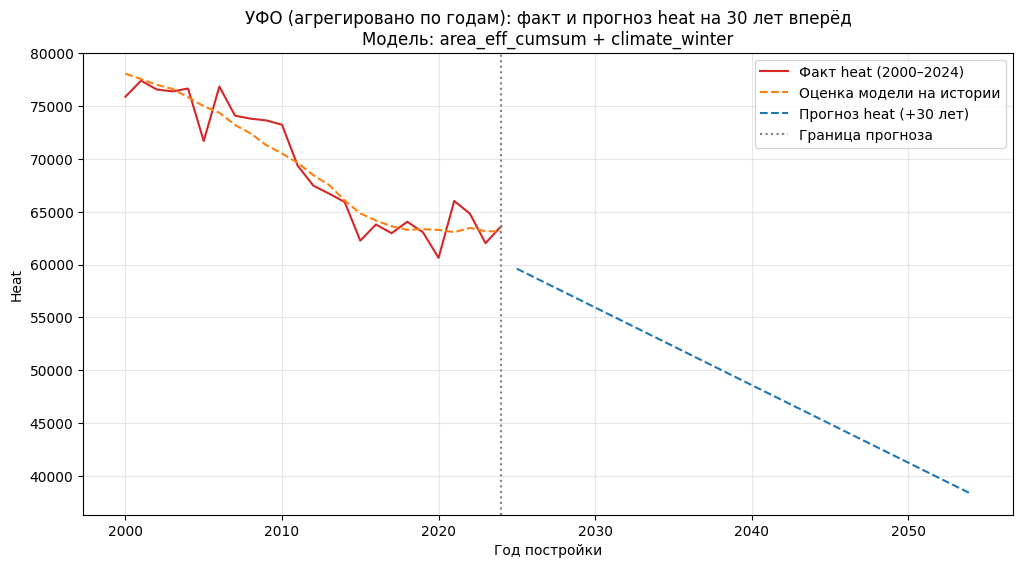

    built_year          heat  area_eff_cumsum  climate_winter     heat_pred  \
15        2015  62258.500000     2.824598e+08      -18.740000  64836.759503   
16        2016  63787.500000     2.855642e+08      -17.840000  64167.195402   
17        2017  62960.200000     2.875621e+08      -17.830000  63618.612867   
18        2018  64048.300000     2.882288e+08      -18.530000  63290.147480   
19        2019  63058.570000     2.885221e+08      -17.870000  63345.744081   
20        2020  60631.140000     2.887633e+08      -17.910000  63270.993320   
21        2021  66013.250000     2.888816e+08      -18.740000  63066.817466   
22        2022  64817.400000     2.889397e+08      -16.770000  63458.055416   
23        2023  62020.200000     2.889685e+08      -18.190000  63156.548587   
24        2024  63626.300000     2.889974e+08      -18.320000  63121.720741   
25        2025  59605.598150     3.021174e+08      -17.836400           NaN   
26        2026  58870.949207     3.048268e+08      -

In [34]:
#УФО: регрессия обычная + прогноз на 30 лет вперёд

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

mask = (df_final["built_year"] >= 2000) & (df_final["built_year"] <= 2024)
df_yearly = (
    df_final.loc[mask, ["built_year", "heat", "area_eff_cumsum", "climate_winter"]]
            .groupby("built_year", as_index=False)
            .agg({
                'heat': 'sum',
                'area_eff_cumsum': 'sum', 
                'climate_winter': 'mean'
            })
)

# 2) интерполяция пропусков
df_yearly[["heat", "area_eff_cumsum", "climate_winter"]] = (
    df_yearly[["heat", "area_eff_cumsum", "climate_winter"]]
    .interpolate(method="linear")
)

# 3) обучение регрессии
X = df_yearly[["area_eff_cumsum", "climate_winter"]]
y = df_yearly["heat"]

reg = LinearRegression()
reg.fit(X, y)

print("Intercept:", reg.intercept_)
print("Coef area_eff_cumsum:", reg.coef_[0])
print("Coef climate_winter:", reg.coef_[1])

# 4) прогноз на 30 лет вперёд
last_year = int(df_yearly["built_year"].max())
future_years = np.arange(last_year + 1, last_year + 31)

# линейная экстраполяция признаков
coef_area = np.polyfit(df_yearly["built_year"], df_yearly["area_eff_cumsum"], 1)
coef_clim = np.polyfit(df_yearly["built_year"], df_yearly["climate_winter"], 1)
area_trend = np.poly1d(coef_area)
clim_trend = np.poly1d(coef_clim)

future_area = area_trend(future_years)
future_climate = clim_trend(future_years)

future_data = pd.DataFrame({
    "built_year": future_years,
    "area_eff_cumsum": future_area,
    "climate_winter": future_climate
})
future_data["heat_pred"] = reg.predict(future_data[["area_eff_cumsum", "climate_winter"]])

# 5) прогноз и история
df_yearly["heat_pred"] = reg.predict(df_yearly[["area_eff_cumsum", "climate_winter"]])

df_all = pd.concat(
    [
        df_yearly.assign(type="Факт"),
        future_data.rename(columns={"heat_pred": "heat"}).assign(type="Прогноз")
    ],
    ignore_index=True
)

# 6) график
plt.figure(figsize=(12,6))
hist = df_all[df_all["type"] == "Факт"]
fut = df_all[df_all["type"] == "Прогноз"]

plt.plot(hist["built_year"], hist["heat"], label="Факт heat (2000–2024)", color="tab:red")
plt.plot(hist["built_year"], hist["heat_pred"], label="Оценка модели на истории", color="tab:orange", linestyle="--")
plt.plot(fut["built_year"], fut["heat"], label="Прогноз heat (+30 лет)", color="tab:blue", linestyle="--")

plt.axvline(x=last_year, color="gray", linestyle=":", label="Граница прогноза")
plt.title("УФО (агрегировано по годам): факт и прогноз heat на 30 лет вперёд\nМодель: area_eff_cumsum + climate_winter")
plt.xlabel("Год постройки")
plt.ylabel("Heat")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# 7) таблица
print(df_all.tail(40))  # последние 40 лет (факт + прогноз)


Базовая регрессия:
Intercept: 146561.67023932107
Coef area_eff_cumsum: -0.00027561733822788616
Coef climate_winter: 206.72789440981842

Неверные знаки, применяем жёсткую регрессию...
Жёсткая модель:
Intercept: 794.3101874877902
Coef area_eff_cumsum: 0.0002561376511950393
Coef climate_winter: -1.798674955972328e-11
R2 жёсткой модели: -2.548078951516454


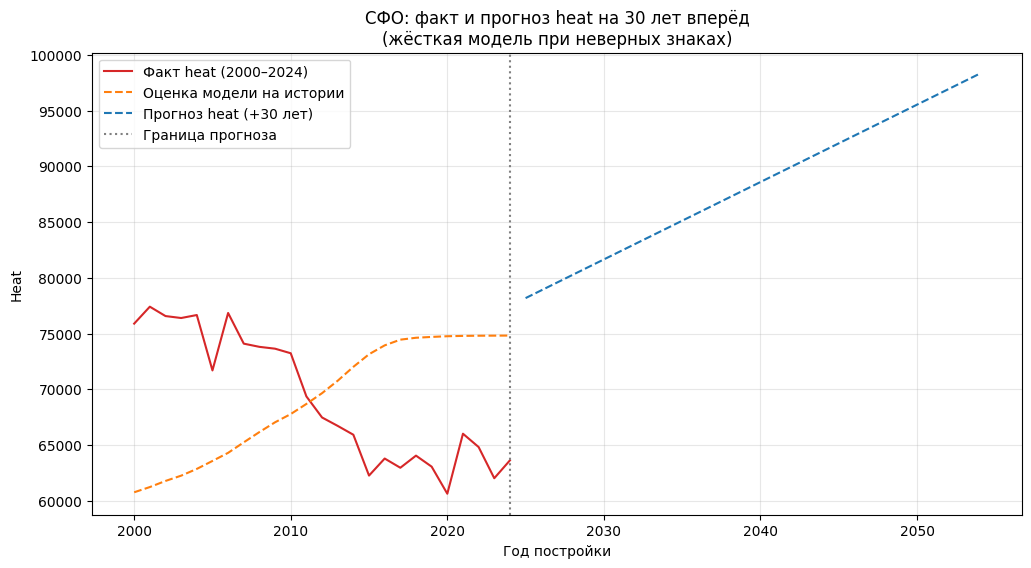

    built_year          heat     heat_pred     type
15        2015  62258.500000  73142.910848     Факт
16        2016  63787.500000  73938.057827     Факт
17        2017  62960.200000  74449.789602     Факт
18        2018  64048.300000  74620.558230     Факт
19        2019  63058.570000  74695.688276     Факт
20        2020  60631.140000  74757.471228     Факт
21        2021  66013.250000  74787.759460     Факт
22        2022  64817.400000  74802.643505     Факт
23        2023  62020.200000  74810.034619     Факт
24        2024  63626.300000  74817.425732     Факт
25        2025  78177.948670           NaN  Прогноз
26        2026  78871.942076           NaN  Прогноз
27        2027  79565.935481           NaN  Прогноз
28        2028  80259.928887           NaN  Прогноз
29        2029  80953.922292           NaN  Прогноз
30        2030  81647.915698           NaN  Прогноз
31        2031  82341.909103           NaN  Прогноз
32        2032  83035.902508           NaN  Прогноз
33        20

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.optimize import minimize
from sklearn.metrics import r2_score

# ===== 0) Фильтр по годам и агрегация =====
mask = (df_final["built_year"] >= 2000) & (df_final["built_year"] <= 2024)
df_yearly = (
    df_final.loc[mask, ["built_year", "heat", "area_eff_cumsum", "climate_winter"]]
            .groupby("built_year", as_index=False)
            .agg({
                'heat': 'sum',
                'area_eff_cumsum': 'sum', 
                'climate_winter': 'mean'
            })
)
df_yearly[["heat", "area_eff_cumsum", "climate_winter"]] = df_yearly[["heat", "area_eff_cumsum", "climate_winter"]].interpolate(method="linear")

# ===== 1) Базовая линейная регрессия =====
X = df_yearly[["area_eff_cumsum", "climate_winter"]].values
y = df_yearly["heat"].values

reg = LinearRegression()
reg.fit(X, y)
coefs_base = reg.coef_
intercept_base = reg.intercept_

print("Базовая регрессия:")
print("Intercept:", intercept_base)
print("Coef area_eff_cumsum:", coefs_base[0])
print("Coef climate_winter:", coefs_base[1])

# ===== 2) Проверяем знаки и при необходимости применяем жёсткую модель =====
# ожидаем: area >=0, climate <=0
apply_hard = False
if coefs_base[0] < 0 or coefs_base[1] > 0:
    apply_hard = True
    print("\nНеверные знаки, применяем жёсткую регрессию...")

if apply_hard:
    def mse_beta(beta, X, y):
        return np.mean((y - X @ beta) ** 2)
    
    bounds = [(0, None),    # area_eff_cumsum >=0
              (None, 0)]    # climate_winter <=0
    
    res = minimize(mse_beta, coefs_base, args=(X, y), bounds=bounds, method="L-BFGS-B")
    beta_fixed = res.x
    intercept_fixed = np.mean(y) - np.mean(X @ beta_fixed)
    
    y_pred = intercept_fixed + X @ beta_fixed
    print("Жёсткая модель:")
    print("Intercept:", intercept_fixed)
    print("Coef area_eff_cumsum:", beta_fixed[0])
    print("Coef climate_winter:", beta_fixed[1])
    r2_model = r2_score(y, y_pred)
    print("R2 жёсткой модели:", r2_model)
else:
    beta_fixed = coefs_base
    intercept_fixed = intercept_base
    y_pred = reg.predict(X)
    r2_model = r2_score(y, y_pred)
    print("R2 базовой модели:", r2_model)

# ===== 3) Сохраняем предсказания на истории =====
df_yearly["heat_pred"] = y_pred

# ===== 4) Прогноз на 30 лет вперёд =====
last_year = int(df_yearly["built_year"].max())
future_years = np.arange(last_year + 1, last_year + 31)

coef_area = np.polyfit(df_yearly["built_year"], df_yearly["area_eff_cumsum"], 1)
coef_clim = np.polyfit(df_yearly["built_year"], df_yearly["climate_winter"], 1)
area_trend = np.poly1d(coef_area)
clim_trend = np.poly1d(coef_clim)

future_area = area_trend(future_years)
future_climate = clim_trend(future_years)

future_data = pd.DataFrame({
    "built_year": future_years,
    "area_eff_cumsum": future_area,
    "climate_winter": future_climate
})
future_data["heat_pred"] = intercept_fixed + future_data[["area_eff_cumsum", "climate_winter"]].values @ beta_fixed
future_data["type"] = "Прогноз"

# ===== 5) Объединяем факт и прогноз =====
df_hist = df_yearly[["built_year", "heat", "heat_pred"]].copy()
df_hist["type"] = "Факт"
df_all = pd.concat([df_hist, future_data[["built_year", "heat_pred", "type"]].rename(columns={"heat_pred":"heat"})],
                   ignore_index=True).sort_values("built_year")

# ===== 6) График =====
plt.figure(figsize=(12,6))
hist = df_all[df_all["type"] == "Факт"]
fut = df_all[df_all["type"] == "Прогноз"]

plt.plot(hist["built_year"], hist["heat"], label="Факт heat (2000–2024)", color="tab:red")
plt.plot(hist["built_year"], hist["heat_pred"], label="Оценка модели на истории", color="tab:orange", linestyle="--")
plt.plot(fut["built_year"], fut["heat"], label="Прогноз heat (+30 лет)", color="tab:blue", linestyle="--")

plt.axvline(x=last_year, color="gray", linestyle=":", label="Граница прогноза")
plt.title("СФО: факт и прогноз heat на 30 лет вперёд\n(жёсткая модель при неверных знаках)")
plt.xlabel("Год постройки")
plt.ylabel("Heat")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# ===== 7) Таблица =====
print(df_all.tail(40))


Intercept: 69156.0344
Coef area_eff_cumsum (std): -5521.1387278361435
Coef climate_winter (std): 132.37214378689245


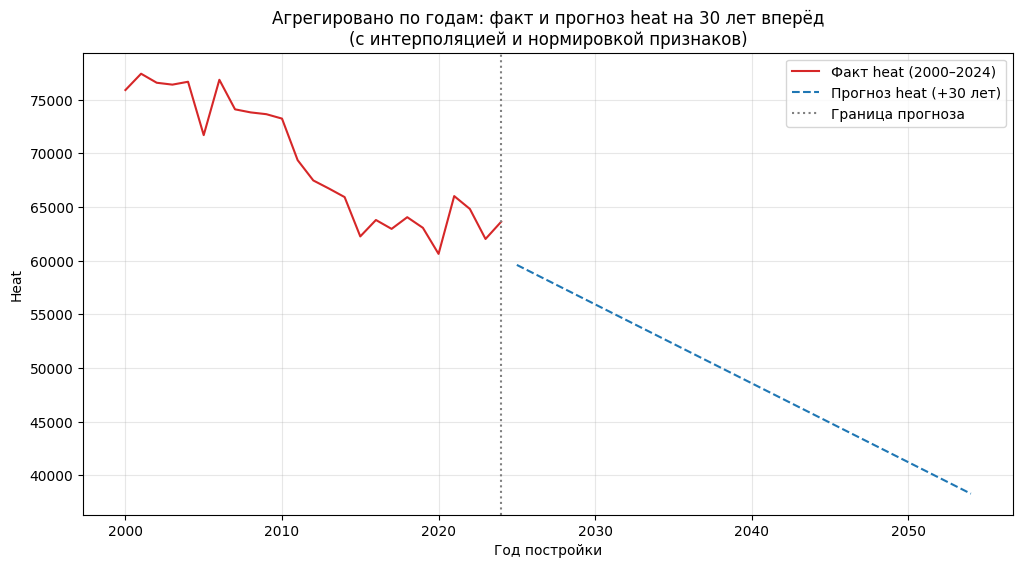

    built_year          heat     type
15        2015  62258.500000     Факт
16        2016  63787.500000     Факт
17        2017  62960.200000     Факт
18        2018  64048.300000     Факт
19        2019  63058.570000     Факт
20        2020  60631.140000     Факт
21        2021  66013.250000     Факт
22        2022  64817.400000     Факт
23        2023  62020.200000     Факт
24        2024  63626.300000     Факт
25        2025  59605.598150  Прогноз
26        2026  58870.949207  Прогноз
27        2027  58136.300265  Прогноз
28        2028  57401.651323  Прогноз
29        2029  56667.002380  Прогноз
30        2030  55932.353438  Прогноз
31        2031  55197.704496  Прогноз
32        2032  54463.055553  Прогноз
33        2033  53728.406611  Прогноз
34        2034  52993.757669  Прогноз
35        2035  52259.108726  Прогноз
36        2036  51524.459784  Прогноз
37        2037  50789.810841  Прогноз
38        2038  50055.161899  Прогноз
39        2039  49320.512957  Прогноз
40        20

In [36]:
#УФО: регрессия на нормированных данных + прогноз на 30 лет вперёд

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# 0) гарантируем числовые типы
for c in ["built_year", "heat", "area_eff_cumsum", "climate_winter"]:
    df_final[c] = pd.to_numeric(df_final[c], errors="coerce")

# 1) агрегация по годам (2000–2024) и снятие возможных дублей лет
mask = (df_final["built_year"] >= 2000) & (df_final["built_year"] <= 2024)
df_yearly = (
    df_final.loc[mask, ["built_year", "heat", "area_eff_cumsum", "climate_winter"]]
            .groupby("built_year", as_index=False)
            .agg({
                'heat': 'sum',
                'area_eff_cumsum': 'sum', 
                'climate_winter': 'mean'
            })
            .sort_values("built_year")
)

# на всякий случай удалим дубликаты лет (хотя groupby уже их схлопывает)
df_yearly = df_yearly.drop_duplicates(subset=["built_year"], keep="first")

# 2) ставим годы индексом, интерполируем по индексу, возвращаем столбец лет
df_yearly = df_yearly.set_index("built_year")
df_yearly = df_yearly.interpolate(method="index")  # линейно по оси лет
df_yearly = df_yearly.reset_index()

# 3) нормировка признаков
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_yearly[["area_eff_cumsum", "climate_winter"]])
y = df_yearly["heat"].values

# 4) модель
reg = LinearRegression()
reg.fit(X_scaled, y)

print("Intercept:", reg.intercept_)
print("Coef area_eff_cumsum (std):", reg.coef_[0])
print("Coef climate_winter (std):", reg.coef_[1])

# 5) предсказание на истории
df_yearly["heat_pred"] = reg.predict(X_scaled)

# 6) прогноз на 30 лет вперёд
last_year = int(df_yearly["built_year"].max())
future_years = np.arange(last_year + 1, last_year + 31)

# линейные тренды для признаков по истории
coef_area = np.polyfit(df_yearly["built_year"], df_yearly["area_eff_cumsum"], 1)
coef_clim = np.polyfit(df_yearly["built_year"], df_yearly["climate_winter"], 1)
area_trend = np.poly1d(coef_area)
clim_trend = np.poly1d(coef_clim)

future_area = area_trend(future_years)
future_climate = clim_trend(future_years)

# масштабируем будущее — строго в том же порядке колонок:
future_scaled = scaler.transform(
    pd.DataFrame({"area_eff_cumsum": future_area,
                  "climate_winter": future_climate})
)

future_data = pd.DataFrame({
    "built_year": future_years,
    "area_eff_cumsum": future_area,
    "climate_winter": future_climate,
    "heat": reg.predict(future_scaled),
    "type": "Прогноз"
})

# 7) итоговая таблица факт+прогноз (с правильной меткой type)
df_hist = df_yearly[["built_year", "heat"]].copy()
df_hist["type"] = "Факт"

df_all = pd.concat([df_hist, future_data[["built_year", "heat", "type"]]],
                   ignore_index=True).sort_values("built_year")

# 8) график
plt.figure(figsize=(12,6))
hist = df_all[df_all["type"] == "Факт"]
fut  = df_all[df_all["type"] == "Прогноз"]

plt.plot(hist["built_year"], hist["heat"], label="Факт heat (2000–2024)", color="tab:red")
plt.plot(fut["built_year"],  fut["heat"],  label="Прогноз heat (+30 лет)", color="tab:blue", linestyle="--")

plt.axvline(x=last_year, color="gray", linestyle=":", label="Граница прогноза")
plt.title("Агрегировано по годам: факт и прогноз heat на 30 лет вперёд\n(с интерполяцией и нормировкой признаков)")
plt.xlabel("Год постройки")
plt.ylabel("Heat")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

print(df_all.tail(40))


R2 базовой модели: 0.9169
Базовые коэффициенты: [-5521.13872784   132.37214379] Intercept: 69156.0344
R2 жёсткой модели: 0.3790
Финальные коэффициенты с фиксированными знаками: [    0.         -3483.16060789] Intercept: 69156.03439999999


C:\Users\Артем\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


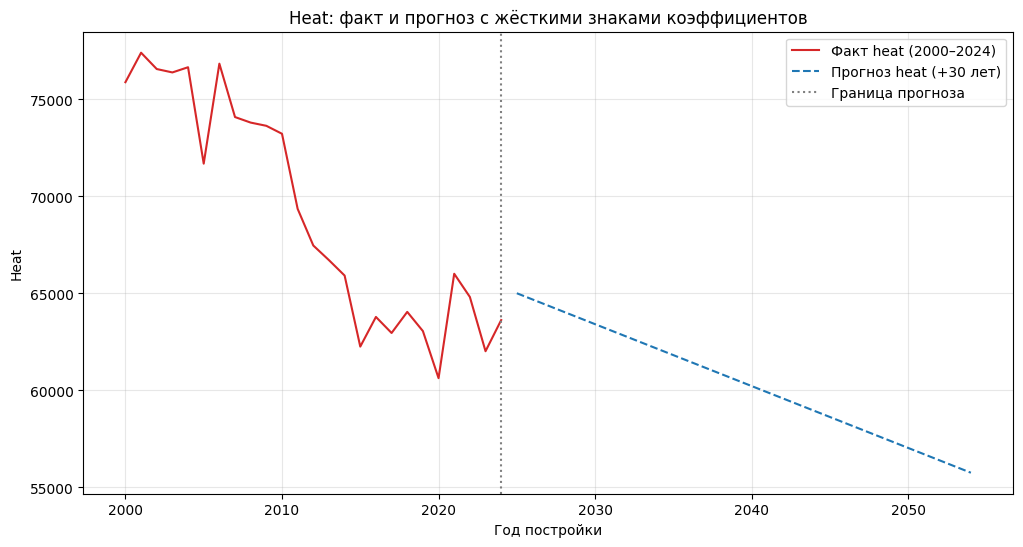

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from scipy.optimize import minimize

# ===== 0) Подготовка данных =====
for c in ["built_year", "heat", "area_eff_cumsum", "climate_winter"]:
    df_final[c] = pd.to_numeric(df_final[c], errors="coerce")

mask = (df_final["built_year"] >= 2000) & (df_final["built_year"] <= 2024)
df_yearly = (
    df_final.loc[mask, ["built_year", "heat", "area_eff_cumsum", "climate_winter"]]
            .groupby("built_year", as_index=False)
            .agg({
                'heat': 'sum',
                'area_eff_cumsum': 'sum', 
                'climate_winter': 'mean'
            })
            .sort_values("built_year")
)
df_yearly = df_yearly.drop_duplicates(subset=["built_year"], keep="first")
df_yearly = df_yearly.set_index("built_year").interpolate(method="index").reset_index()

# ===== 1) Нормировка признаков =====
scaler = StandardScaler()
X = df_yearly[["area_eff_cumsum", "climate_winter"]].values
X_scaled = scaler.fit_transform(X)
y = df_yearly["heat"].values

# ===== 2) Базовая линейная регрессия =====
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_scaled, y)
y_pred_base = reg.predict(X_scaled)
r2_base = r2_score(y, y_pred_base)
print(f"R2 базовой модели: {r2_base:.4f}")
print("Базовые коэффициенты:", reg.coef_, "Intercept:", reg.intercept_)

# ===== 3) Жёсткое закрепление знаков =====
def mse_beta(beta, X, y):
    """Функция потерь (MSE)"""
    return np.mean((y - X @ beta) ** 2)

# Bounds: area >=0, climate <=0
bounds = [(0, None),  # area_eff_cumsum >= 0
          (None, 0)]  # climate_winter <= 0

res = minimize(mse_beta, reg.coef_, args=(X_scaled, y), bounds=bounds, method="L-BFGS-B")
beta_fixed = res.x
intercept_fixed = np.mean(y) - np.mean(X_scaled @ beta_fixed)

y_pred_fixed = intercept_fixed + X_scaled @ beta_fixed
r2_fixed = r2_score(y, y_pred_fixed)
print(f"R2 жёсткой модели: {r2_fixed:.4f}")
print("Финальные коэффициенты с фиксированными знаками:", beta_fixed, "Intercept:", intercept_fixed)

# ===== 4) Сохраняем предсказание на истории =====
df_yearly["heat_pred"] = y_pred_fixed

# ===== 5) Прогноз на 30 лет вперёд =====
last_year = int(df_yearly["built_year"].max())
future_years = np.arange(last_year + 1, last_year + 31)

coef_area_trend = np.polyfit(df_yearly["built_year"], df_yearly["area_eff_cumsum"], 1)
coef_clim_trend = np.polyfit(df_yearly["built_year"], df_yearly["climate_winter"], 1)
area_trend = np.poly1d(coef_area_trend)
clim_trend = np.poly1d(coef_clim_trend)

future_area = area_trend(future_years)
future_climate = clim_trend(future_years)

future_scaled = scaler.transform(
    pd.DataFrame({"area_eff_cumsum": future_area, "climate_winter": future_climate})
)
future_heat = intercept_fixed + future_scaled @ beta_fixed

future_data = pd.DataFrame({
    "built_year": future_years,
    "area_eff_cumsum": future_area,
    "climate_winter": future_climate,
    "heat": future_heat,
    "type": "Прогноз"
})

# ===== 6) Объединяем факт и прогноз =====
df_hist = df_yearly[["built_year", "heat"]].copy()
df_hist["type"] = "Факт"
df_all = pd.concat([df_hist, future_data[["built_year", "heat", "type"]]],
                   ignore_index=True).sort_values("built_year")

# ===== 7) График =====
plt.figure(figsize=(12,6))
hist = df_all[df_all["type"] == "Факт"]
fut  = df_all[df_all["type"] == "Прогноз"]

plt.plot(hist["built_year"], hist["heat"], label="Факт heat (2000–2024)", color="tab:red")
plt.plot(fut["built_year"],  fut["heat"],  label="Прогноз heat (+30 лет)", color="tab:blue", linestyle="--")

plt.axvline(x=last_year, color="gray", linestyle=":", label="Граница прогноза")
plt.title("Heat: факт и прогноз с жёсткими знаками коэффициентов")
plt.xlabel("Год постройки")
plt.ylabel("Heat")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


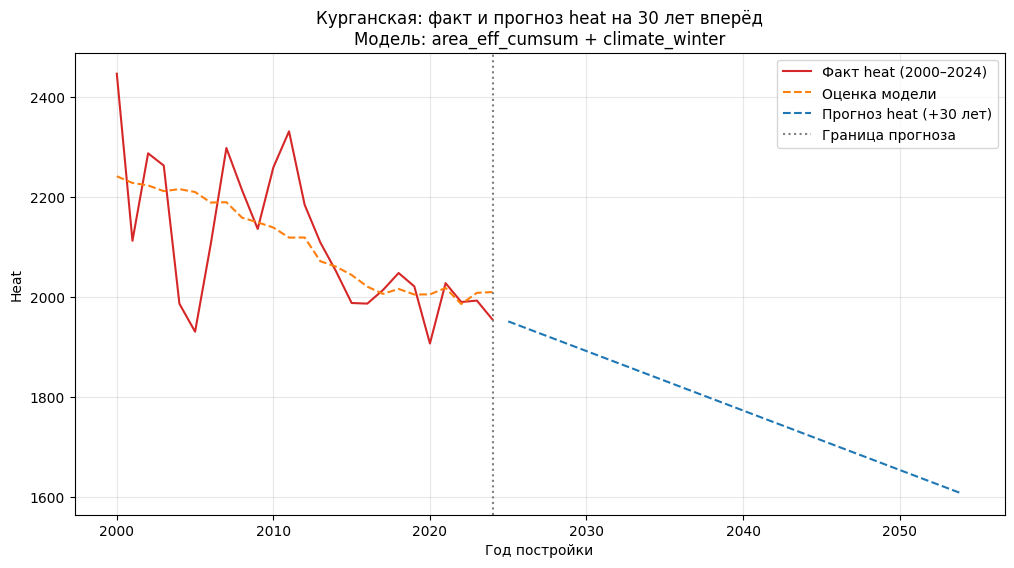

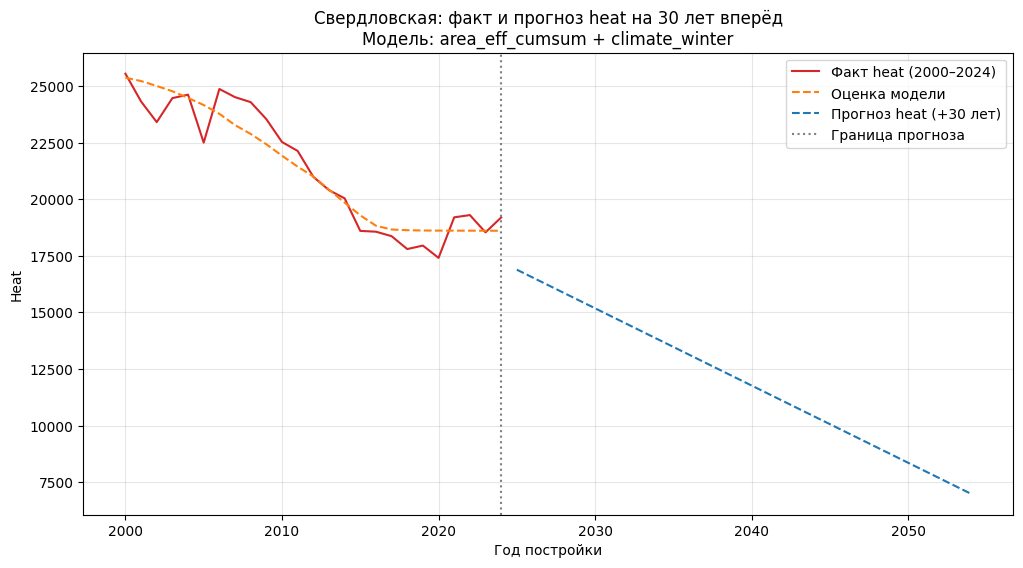

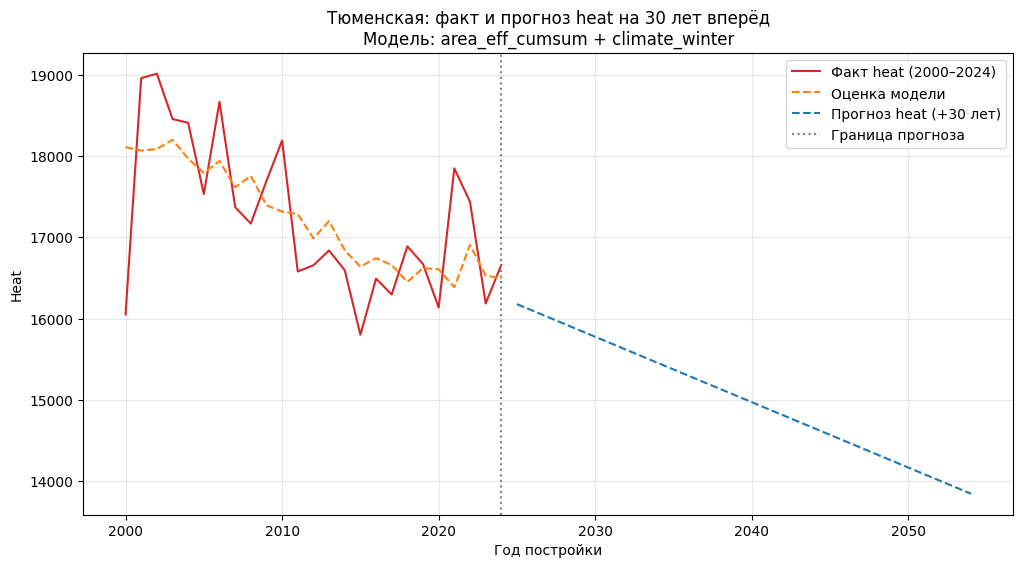

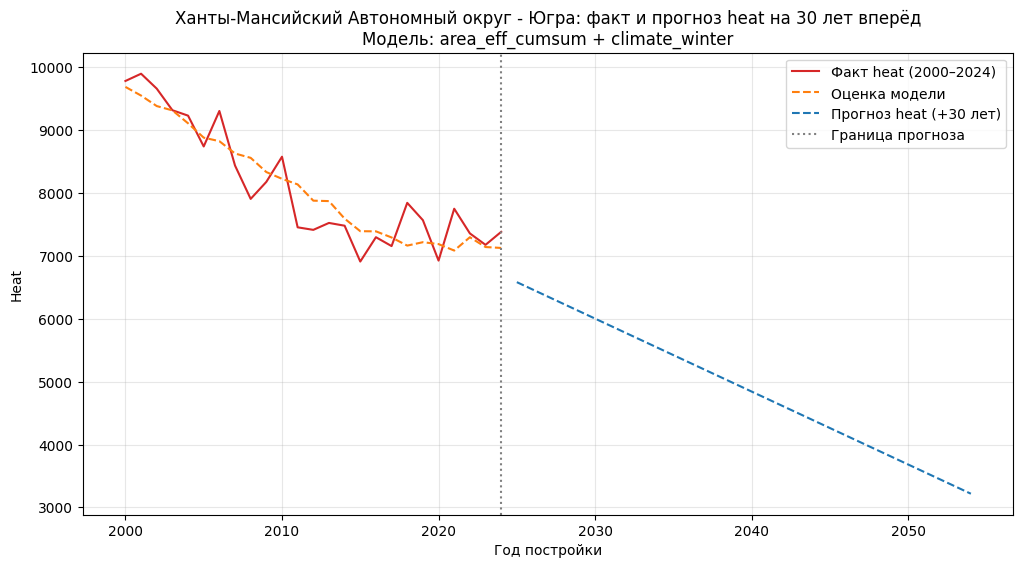

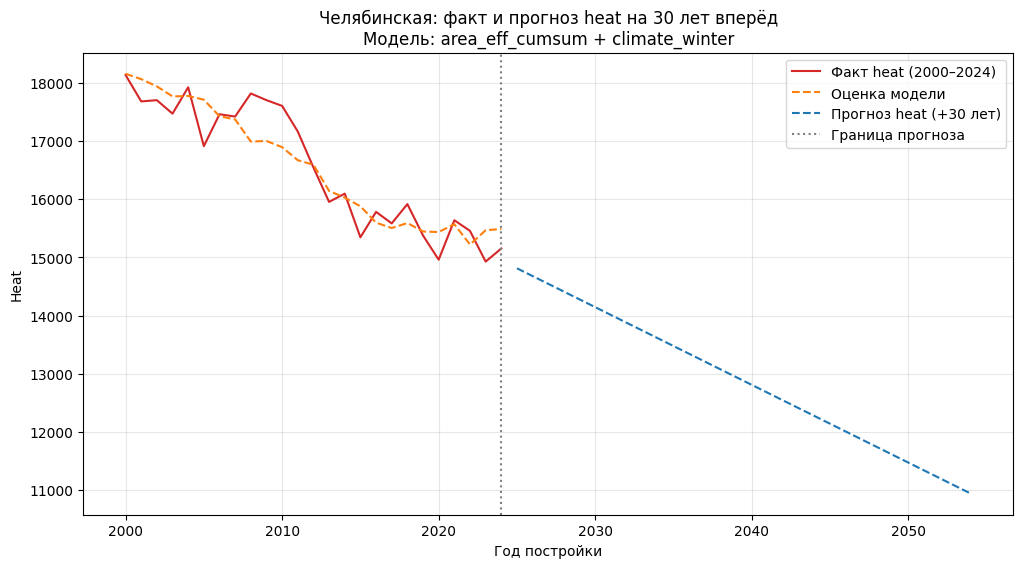

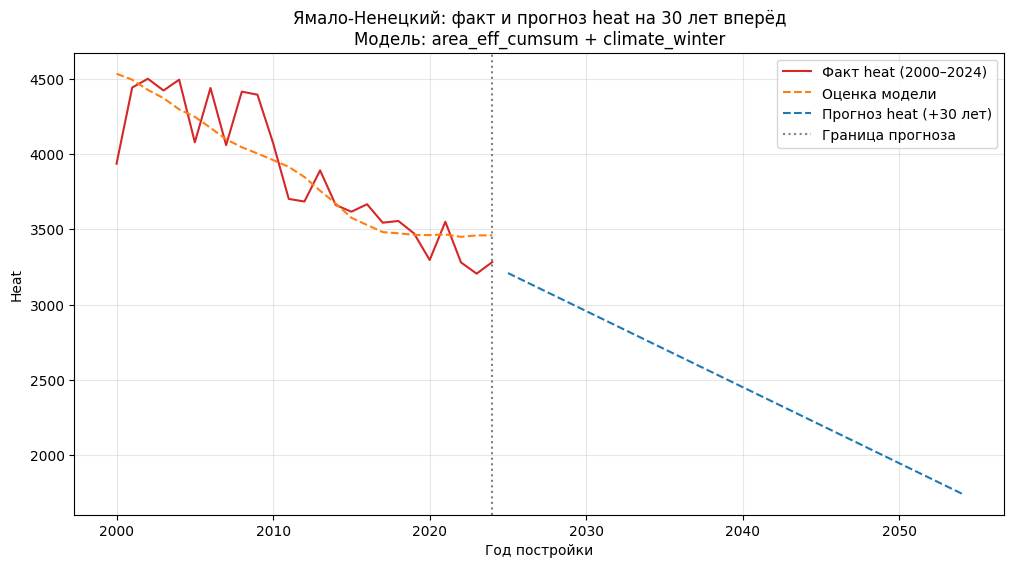

                                     Регион     Intercept  \
0                                Курганская   8404.337710   
1                              Свердловская  62393.920242   
2                                 Тюменская  25923.535889   
3  Ханты-Мансийский Автономный округ - Югра  18079.573706   
4                               Челябинская  28117.046739   
5                            Ямало-Ненецкий   7874.874111   

   Coef_area_eff_cumsum  Coef_climate_winter        R2  
0             -0.000216           -15.995605  0.394387  
1             -0.000441             0.315642  0.901946  
2             -0.000154           265.044103  0.423353  
3             -0.000238           109.477203  0.847664  
4             -0.000196          -175.190660  0.857940  
5             -0.000432            -7.497140  0.762063  


In [38]:
#УФО по регионам: регрессия обычная + прогноз на 30 лет вперёд

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

regions = df_final["formalname_region"].unique()

results = []  # сюда будем складывать коэффициенты регрессии

for region in regions:
    mask = (
        (df_final["built_year"] >= 2000)
        & (df_final["built_year"] <= 2024)
        & (df_final["formalname_region"] == region)
    )
    df_yearly = (
        df_final.loc[mask, ["built_year", "heat", "area_eff_cumsum", "climate_winter"]]
        .groupby("built_year", as_index=False)
        .agg({
                'heat': 'sum',
                'area_eff_cumsum': 'sum', 
                'climate_winter': 'mean'
            })
    )
    
    if df_yearly.empty:
        continue  # если по региону нет данных, пропускаем

    # интерполяция
    df_yearly[["heat", "area_eff_cumsum", "climate_winter"]] = (
        df_yearly[["heat", "area_eff_cumsum", "climate_winter"]]
        .interpolate(method="linear")
    )

    # регрессия
    X = df_yearly[["area_eff_cumsum", "climate_winter"]]
    y = df_yearly["heat"]
    reg = LinearRegression()
    reg.fit(X, y)

    # сохраняем коэффициенты
    results.append({
        "Регион": region,
        "Intercept": reg.intercept_,
        "Coef_area_eff_cumsum": reg.coef_[0],
        "Coef_climate_winter": reg.coef_[1],
        "R2": reg.score(X, y)  # качество на истории
    })

    # прогноз на 30 лет
    last_year = int(df_yearly["built_year"].max())
    future_years = np.arange(last_year + 1, last_year + 31)

    coef_area = np.polyfit(df_yearly["built_year"], df_yearly["area_eff_cumsum"], 1)
    coef_clim = np.polyfit(df_yearly["built_year"], df_yearly["climate_winter"], 1)
    area_trend = np.poly1d(coef_area)
    clim_trend = np.poly1d(coef_clim)

    future_area = area_trend(future_years)
    future_climate = clim_trend(future_years)

    future_data = pd.DataFrame({
        "built_year": future_years,
        "area_eff_cumsum": future_area,
        "climate_winter": future_climate
    })
    future_data["heat_pred"] = reg.predict(future_data[["area_eff_cumsum", "climate_winter"]])

    # прогноз и история
    df_yearly["heat_pred"] = reg.predict(df_yearly[["area_eff_cumsum", "climate_winter"]])

    df_all = pd.concat(
        [
            df_yearly.assign(type="Факт"),
            future_data.rename(columns={"heat_pred": "heat"}).assign(type="Прогноз")
        ],
        ignore_index=True
    )

    # график
    plt.figure(figsize=(12,6))
    hist = df_all[df_all["type"] == "Факт"]
    fut = df_all[df_all["type"] == "Прогноз"]

    plt.plot(hist["built_year"], hist["heat"], label="Факт heat (2000–2024)", color="tab:red")
    plt.plot(hist["built_year"], hist["heat_pred"], label="Оценка модели", color="tab:orange", linestyle="--")
    plt.plot(fut["built_year"], fut["heat"], label="Прогноз heat (+30 лет)", color="tab:blue", linestyle="--")

    plt.axvline(x=last_year, color="gray", linestyle=":", label="Граница прогноза")
    plt.title(f"{region}: факт и прогноз heat на 30 лет вперёд\nМодель: area_eff_cumsum + climate_winter")
    plt.xlabel("Год постройки")
    plt.ylabel("Heat")
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()

# Собираем все коэффициенты в таблицу
df_results = pd.DataFrame(results)

# выводим
print(df_results)

# можно сохранить в Excel
#df_results.to_excel("regression_coeffs_by_region.xlsx", index=False)


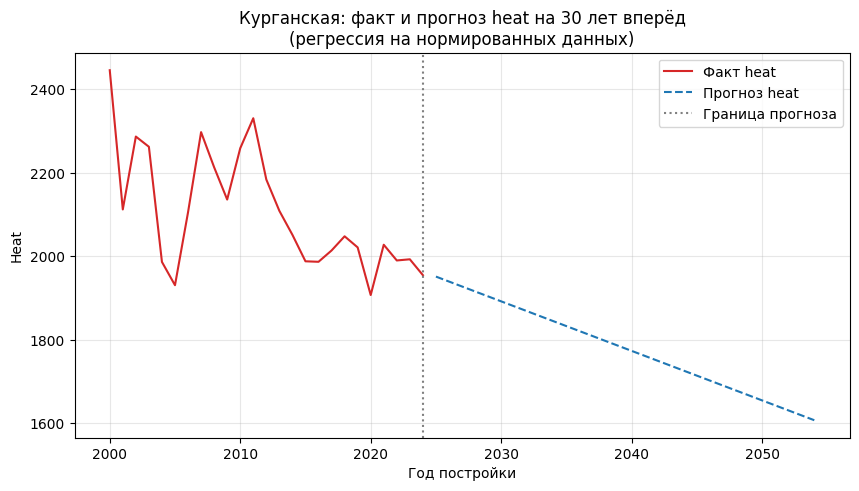

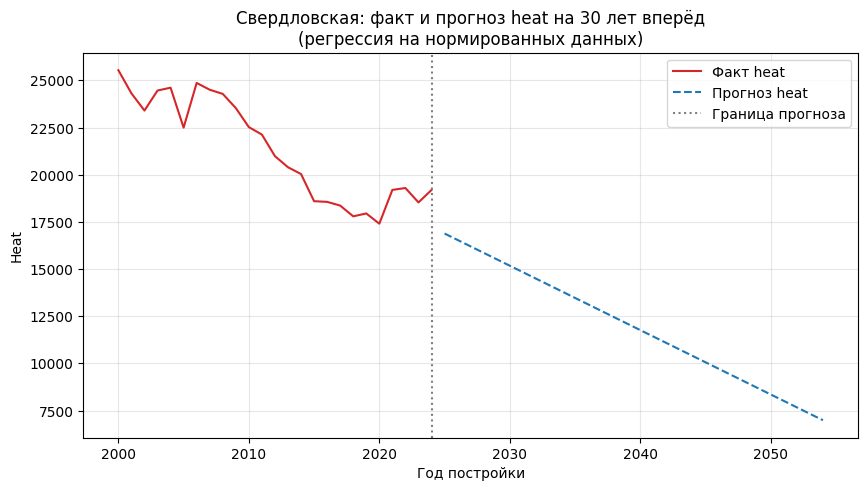

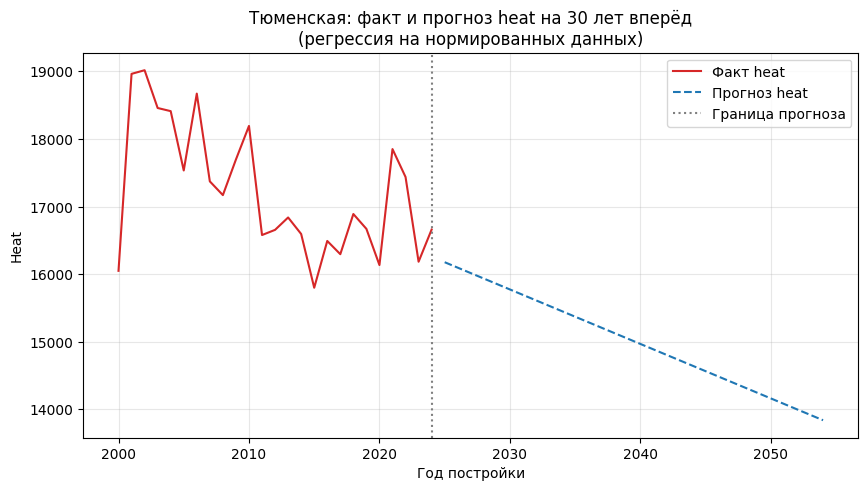

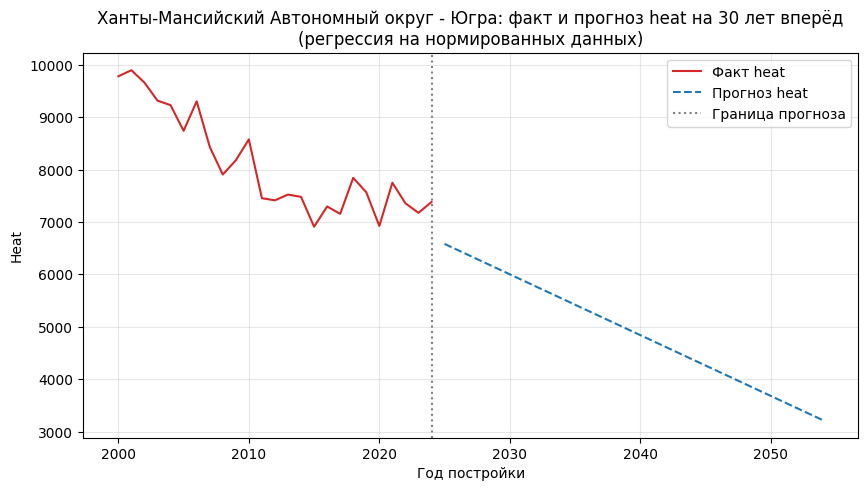

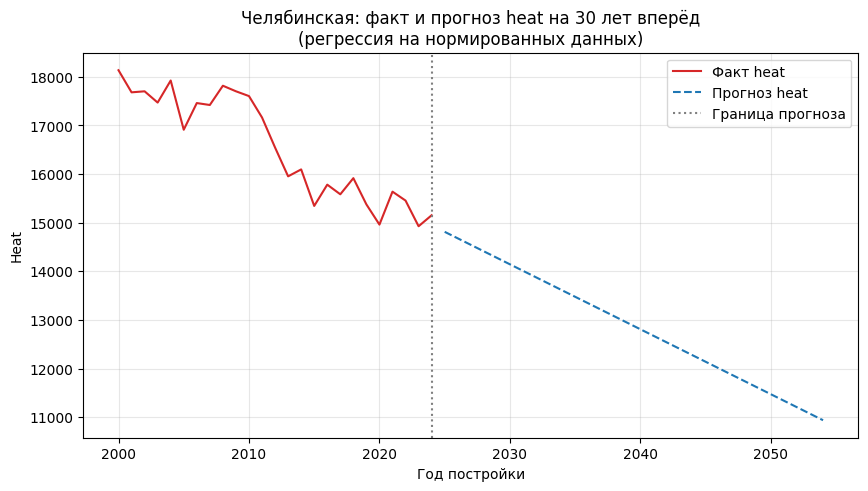

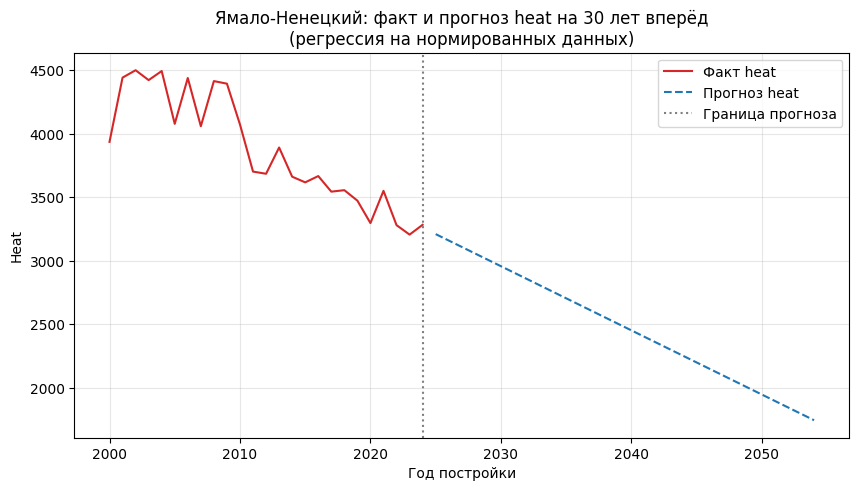

                                     Регион   Intercept  Coef_area_eff_cumsum  \
0                                Курганская   2105.5824            -80.979465   
1                              Свердловская  21320.1368          -2534.636494   
2                                 Тюменская  17225.2224           -711.699959   
3  Ханты-Мансийский Автономный округ - Югра   8088.5180           -903.388607   
4                               Челябинская  16549.8268           -911.230766   
5                            Ямало-Ненецкий   3866.7480           -370.355192   

   Coef_climate_winter  R2 (на истории)  
0           -10.242316         0.394387  
1             0.202112         0.901946  
2           169.713217         0.423353  
3            70.100516         0.847664  
4          -112.178201         0.857940  
5            -4.800574         0.762063  


In [39]:
#УФО по регионам: регрессия нормированная + прогноз на 30 лет вперёд

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

regions = df_final["formalname_region"].unique()

results = []  # сюда сложим коэффициенты регрессий

for region in regions:
    # 1) фильтр по региону и годам
    mask = (df_final["built_year"] >= 2000) & (df_final["built_year"] <= 2024) & \
           (df_final["formalname_region"] == region)
    
    df_yearly = (
        df_final.loc[mask, ["built_year", "heat", "area_eff_cumsum", "climate_winter"]]
                .groupby("built_year", as_index=False)
                .agg({
                'heat': 'sum',
                'area_eff_cumsum': 'sum', 
                'climate_winter': 'mean'
            })
                .sort_values("built_year")
    )
    
    if df_yearly.empty:
        continue  # пропускаем регионы без данных
    
    df_yearly = df_yearly.drop_duplicates(subset=["built_year"], keep="first")
    df_yearly = df_yearly.set_index("built_year").interpolate(method="index").reset_index()
    
    # 2) нормировка признаков
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df_yearly[["area_eff_cumsum", "climate_winter"]])
    y = df_yearly["heat"].values
    
    # 3) регрессия
    reg = LinearRegression()
    reg.fit(X_scaled, y)
    
    # сохраняем коэффициенты
    results.append({
        "Регион": region,
        "Intercept": reg.intercept_,
        "Coef_area_eff_cumsum": reg.coef_[0],
        "Coef_climate_winter": reg.coef_[1],
        "R2 (на истории)": reg.score(X_scaled, y)
    })
    
    # 4) прогноз на 30 лет вперёд
    last_year = int(df_yearly["built_year"].max())
    future_years = np.arange(last_year + 1, last_year + 31)

    coef_area = np.polyfit(df_yearly["built_year"], df_yearly["area_eff_cumsum"], 1)
    coef_clim = np.polyfit(df_yearly["built_year"], df_yearly["climate_winter"], 1)
    area_trend = np.poly1d(coef_area)
    clim_trend = np.poly1d(coef_clim)

    future_area = area_trend(future_years)
    future_climate = clim_trend(future_years)

    future_scaled = scaler.transform(
        pd.DataFrame({"area_eff_cumsum": future_area,
                      "climate_winter": future_climate})
    )
    
    future_data = pd.DataFrame({
        "built_year": future_years,
        "heat": reg.predict(future_scaled),
        "type": "Прогноз"
    })

    # 5) история
    df_hist = df_yearly[["built_year", "heat"]].copy()
    df_hist["type"] = "Факт"
    
    df_all = pd.concat([df_hist, future_data], ignore_index=True).sort_values("built_year")
    
    # 6) график
    plt.figure(figsize=(10,5))
    hist = df_all[df_all["type"] == "Факт"]
    fut  = df_all[df_all["type"] == "Прогноз"]
    
    plt.plot(hist["built_year"], hist["heat"], label="Факт heat", color="tab:red")
    plt.plot(fut["built_year"],  fut["heat"],  label="Прогноз heat", color="tab:blue", linestyle="--")
    
    plt.axvline(x=last_year, color="gray", linestyle=":", label="Граница прогноза")
    plt.title(f"{region}: факт и прогноз heat на 30 лет вперёд\n(регрессия на нормированных данных)")
    plt.xlabel("Год постройки")
    plt.ylabel("Heat")
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()

# 7) таблица коэффициентов
df_results = pd.DataFrame(results)
print(df_results)

# можно сохранить в Excel:
# df_results.to_excel("regression_coeffs_by_region.xlsx", index=False)
